In [14]:
# ingest data

In [15]:
import pandas as pd

In [16]:
data = pd.read_csv(r"C:\\FSDS\\ML\\Restaurant_Rating_Prediction\\notebooks\data\\EDA.csv")

EDA

In [17]:
data.head()


,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [18]:
data.sample(5)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
49457,No,No,3.6,123,HSR,Quick Bites,"North Indian, Chinese, Street Food",300.0,Delivery
32329,Yes,No,3.2,21,BTM,"Takeaway, Delivery","Biryani, North Indian",600.0,Delivery
11910,Yes,No,3.7,50,Shanti Nagar,Cafe,"Cafe, Fast Food, Pizza, Burger",550.0,Delivery
45228,Yes,No,3.8,61,Indiranagar,Delivery,"Healthy Food, Sandwich",300.0,Delivery
37476,No,No,3.5,10,BTM,Quick Bites,"South Indian, Chinese",150.0,Dine-out


In [19]:
data.isnull().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

we dont have missing values in data.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51717 non-null  object 
 1   book_table                   51717 non-null  object 
 2   rate                         51717 non-null  float64
 3   votes                        51717 non-null  int64  
 4   location                     51717 non-null  object 
 5   rest_type                    51717 non-null  object 
 6   cuisines                     51717 non-null  object 
 7   approx_cost(for two people)  51717 non-null  float64
 8   listed_in(type)              51717 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [21]:
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [22]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [23]:
data.duplicated().sum()

20086

In [24]:
data.shape

(51717, 9)

In [25]:
# Creating a csv file for further process
#df.to_csv("EDA_FE.csv",index=False)

In [26]:
#Categorical Vs Numerical Columns

In [27]:
categorical_columns=data.columns[data.dtypes=="object"]     #categorical columns

In [28]:
numerical_columns=data.columns[data.dtypes!="object"]    #numerical columns

In [29]:
data[categorical_columns].describe()

,online_order,book_table,location,rest_type,cuisines,listed_in(type)
count,51717,51717,51717,51717,51717,51717
unique,2,2,94,94,2724,7
top,Yes,No,BTM,Quick Bites,North Indian,Delivery
freq,30444,45268,5124,19132,2913,25942


In [30]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51717.0,3.700449,0.395391,1.8,3.5,3.700449,3.9,4.9
votes,51717.0,283.697527,803.838853,0.0,7.0,41.000000,198.0,16832.0
approx_cost(for two people),51717.0,416.630112,180.431824,40.0,300.0,400.000000,500.0,950.0


In [31]:
data[categorical_columns]['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [32]:
data[categorical_columns]['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [33]:
data[categorical_columns]['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [34]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51717.0,3.700449,0.395391,1.8,3.5,3.700449,3.9,4.9
votes,51717.0,283.697527,803.838853,0.0,7.0,41.000000,198.0,16832.0
approx_cost(for two people),51717.0,416.630112,180.431824,40.0,300.0,400.000000,500.0,950.0


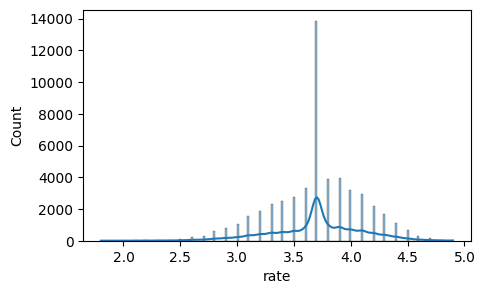

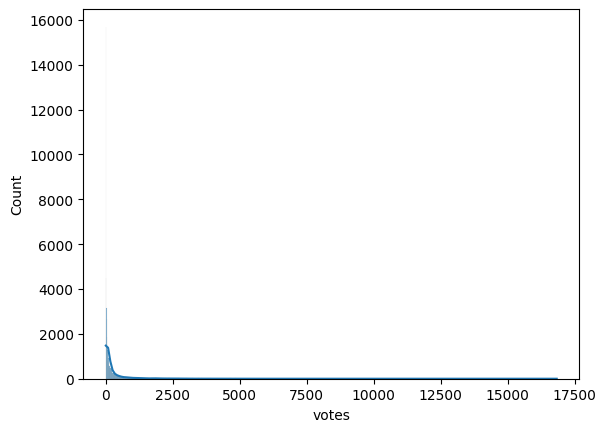

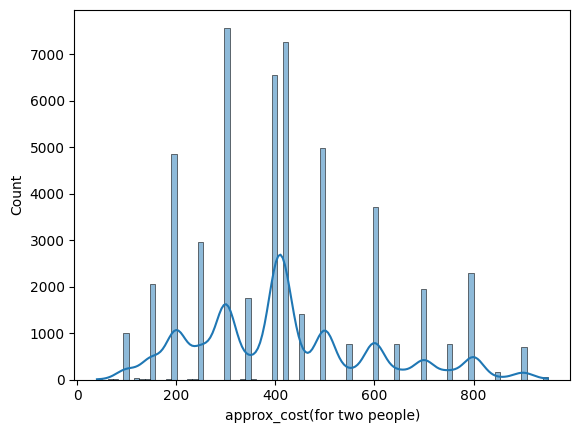

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [36]:
# categorical data

<Axes: >

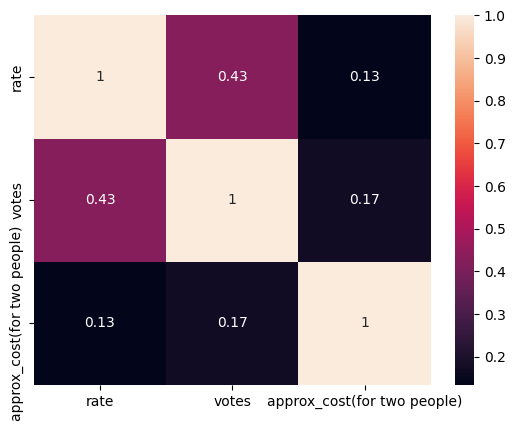

In [37]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [38]:
# Feature Engineering

In [39]:

data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [40]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

threshold for categorical values

In [43]:
import numpy as np

def handle_categorical_columns(data, column_thresholds):  
    for column_name, threshold in column_thresholds.items():
        column_count = data[column_name].value_counts()
        categories_below_threshold = column_count[column_count < threshold].index
        data[column_name] = np.where(data[column_name].isin(categories_below_threshold), 'others', data[column_name])
        print(f"Updated column '{column_name}' with threshold {threshold}")

In [44]:
# Handle categorical columns
column_thresholds = {"rest_type": 1000, "cuisines": 300, "location": 500}
handle_categorical_columns(data, column_thresholds)

Updated column 'rest_type' with threshold 1000
Updated column 'cuisines' with threshold 300
Updated column 'location' with threshold 500


In [45]:
data.to_csv("final_data.csv",index=False)